# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Mimi

Last Name: Bohr

Student ID: 912069485

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
# store data as db
db = sql.connect("sf_data.sqlite")

In [3]:
# look at tables to get a feel for the data
pd.read_sql("SELECT * FROM sqlite_master", db)

,type,name,tbl_name,rootpage,sql
0,table,crime,crime,2,"CREATE TABLE ""crime"" (\n""IncidntNum"" INTEGER,\..."
1,table,noise,noise,35775,"CREATE TABLE ""noise"" (\n""CaseID"" INTEGER,\n ""..."
2,table,parking,parking,35921,"CREATE TABLE ""parking"" (\n""Owner"" TEXT,\n ""Ad..."
3,table,schools,schools,35944,"CREATE TABLE ""schools"" (\n""Name"" TEXT,\n ""Ent..."
4,table,parks,parks,35961,"CREATE TABLE ""parks"" (\n""Name"" TEXT,\n ""Type""..."
5,table,zillow,zillow,35967,"CREATE TABLE ""zillow"" (\n""RegionName"" INTEGER,..."
6,table,mobile_food_permits,mobile_food_permits,36050,"CREATE TABLE ""mobile_food_permits"" (\n""permit""..."
7,table,mobile_food_locations,mobile_food_locations,36060,"CREATE TABLE ""mobile_food_locations"" (\n""locat..."
8,table,mobile_food_schedule,mobile_food_schedule,36079,"CREATE TABLE ""mobile_food_schedule"" (\n""locati..."


In [4]:
# look at first 10 entries of mobile_food_schedule (has locationid and permit)
pd.read_sql("""select * from mobile_food_schedule limit 10""",db)

,locationid,permit,DayOfWeek,EndHour,StartHour
0,305727,11MFF-0040,Mo,15,10
1,305727,11MFF-0040,Tu,15,10
2,305727,11MFF-0040,We,15,10
3,305727,11MFF-0040,Th,15,10
4,305727,11MFF-0040,Fr,15,10
5,305727,11MFF-0040,Sa,15,10
6,305727,11MFF-0040,Su,15,10
7,305727,11MFF-0040,Mo,20,17
8,305727,11MFF-0040,Tu,20,17
9,305727,11MFF-0040,We,20,17


In [5]:
#  look at first 10 entries of mobile_food_permits (see some permits are approved, some expired/requested)
pd.read_sql("""select * from mobile_food_permits limit 10""",db)

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration
0,16MFF-0027,APPROVED,F & C Catering,Truck,Cold Truck: Hot/Cold Sandwiches: Water: Soda: ...,1,2016-03-09 12:00:00,2017-03-15 12:00:00
1,13MFF-0102,EXPIRED,Natan's Catering,Truck,Burgers: melts: hot dogs: burritos:sandwiches:...,1,2013-04-12 12:00:00,2014-03-15 12:00:00
2,16MFF-0069,APPROVED,Munch A Bunch,Truck,Cold Truck: packaged sandwiches: pitas: breakf...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
3,16MFF-0051,APPROVED,Park's Catering,Truck,Cold Truck: Hamburger: cheeseburgers: hot dogs...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
4,16MFF-0010,REQUESTED,Pipo's Grill,Truck,Tacos: Burritos: Hot Dogs: and Hamburgers,0,None,None
5,16MFF-0024,APPROVED,"Off the Grid Services, LLC",Truck,Everything,0,2016-03-17 12:00:00,2017-03-15 12:00:00
6,14MFF-0034,EXPIRED,Bach Catering,Truck,Cold Truck: Cheeseburgers: Burgers: Chicken Ba...,1,2014-03-13 12:00:00,2015-03-15 12:00:00
7,16MFF-0048,REQUESTED,Singh Brothers Ice Cream,Truck,Ice Cream: Pre-Packaged Chips: Candies: Bottle...,1,None,2017-03-15 12:00:00
8,16MFF-0036,APPROVED,Roadside Rotisserie Corporation / Country Grill,Truck,Rotisserie Chicken: Ribs: Kickass Salad: Potat...,0,2016-03-10 12:00:00,2017-03-15 12:00:00
9,14MFF-0001,EXPIRED,Sun Rise Catering,Truck,Cold Truck: sandwiches: drinks: snacks: candy:...,1,2014-09-10 12:00:00,2015-03-15 12:00:00


In [6]:
# assume each permit number corresponds to one vendor
# choose only "approved" permits
# nloc counts the unique location id's corresponding to each permit
pd.read_sql("""
SELECT r.*, count(distinct locationid) AS nloc FROM mobile_food_schedule AS l
INNER JOIN mobile_food_permits AS r
ON l.permit = r.permit
where status = 'APPROVED'
GROUP BY l.permit
ORDER BY nloc desc
LIMIT 10
""", db)

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration,nloc
0,16MFF-0051,APPROVED,Park's Catering,Truck,Cold Truck: Hamburger: cheeseburgers: hot dogs...,1,2016-03-15 12:00:00,2017-03-15 12:00:00,23
1,16MFF-0037,APPROVED,D & T Catering,Truck,Cold Truck: Pre-packaged sandwiches: Chicken B...,1,2016-03-10 12:00:00,2017-03-15 12:00:00,17
2,16MFF-0027,APPROVED,F & C Catering,Truck,Cold Truck: Hot/Cold Sandwiches: Water: Soda: ...,1,2016-03-09 12:00:00,2017-03-15 12:00:00,13
3,16MFF-0069,APPROVED,Munch A Bunch,Truck,Cold Truck: packaged sandwiches: pitas: breakf...,1,2016-03-15 12:00:00,2017-03-15 12:00:00,10
4,16MFF-0019,APPROVED,Linda's Catering,Truck,Hot Dogs: Hamburgers: Nachos: Steaks: Pastas: ...,1,2016-03-07 12:00:00,2017-03-15 12:00:00,7
5,16MFF-0053,APPROVED,Eva's Catering,Truck,Cold Truck: Burrito: Corn Dog: Salads: Sandwic...,1,2016-03-14 12:00:00,2017-03-15 12:00:00,7
6,17MFF-0125,APPROVED,BH & MT LLC,Truck,Cold Truck: Breakfast: Sandwiches: Salads: Pre...,1,2017-02-22 12:00:00,2018-03-15 12:00:00,7
7,16MFF-0047,APPROVED,Golden Catering,Truck,Cold Truck: Pre-packaged Sandwiches: Various B...,1,2016-03-11 12:00:00,2017-03-15 12:00:00,5
8,16MFF-0046,APPROVED,DO UC US Mobile Catering,Truck,Cold truck: sandwiches: salads: beverages: chi...,1,2016-03-11 12:00:00,2017-03-15 12:00:00,4
9,16MFF-0096,APPROVED,Subs on Hubs,Truck,Italian subs: Cuban sandwich: Gyro,0,2016-04-28 12:00:00,2017-03-15 12:00:00,4


Park's Catering sells at the most locations (23), followed by D & T Catering (17), followed by F & X Catering (13), followed by Munch A Bunch (10). All of the remaining mobile food vendors have less than 10 locations.

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

import geopandas as gpd
#import osmnx as ox
import shapely.geometry as geom

__Question 1:__ Which areas have the most and least expensive homes?

In [8]:
# zillow df
zillow = pd.read_sql("""select * from zillow""",db)
zillow.head()

,RegionName,Date,ZriPerSqft_AllHomes,MedianSoldPricePerSqft_AllHomes,PriceToRentRatio_AllHomes,Turnover_AllHomes
0,94109,2010-11-01 00:00:00,3.156,675.1913,19.14,6.0771
1,94110,2010-11-01 00:00:00,2.566,599.6785,18.10,5.4490
2,94122,2010-11-01 00:00:00,2.168,495.4432,17.99,2.4198
3,94080,2010-11-01 00:00:00,1.666,369.5538,18.31,3.8757
4,94112,2010-11-01 00:00:00,2.322,422.4538,14.44,3.1288


In [9]:
# read in zip codes shapefile
zips = gpd.read_file("cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp")
zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [10]:
# zip codes in the zillow df
which_zips = [str(x) for x in zillow['RegionName'].values]
# subset zips for only zip codes in the zillow df
zips = zips.loc[zips['ZCTA5CE10'].isin(set(which_zips))]

In [11]:
# rename zipcodes column in zips
zips['RegionName'] = zips['ZCTA5CE10']
# sort values by region name
zips = zips.reset_index().sort_values(by = 'RegionName')

In [12]:
# use only region name and geometry columns
zips = zips[['RegionName', 'geometry']].reset_index(drop = True)

In [13]:
# sort by zip code
zillow = zillow.reset_index(drop = True).sort_values(by = 'RegionName')

In [14]:
# get mean of 'MedianSoldPricePerSqft' for each zip code (across all dates)
MedianSoldPricePerSqft_AllHomes = zillow.groupby('RegionName', as_index = False).agg({'MedianSoldPricePerSqft_AllHomes': 'mean'})['MedianSoldPricePerSqft_AllHomes']

In [15]:
# new column in zips for above calculated values
zips['MedianSoldPricePerSqft_AllHomes'] = MedianSoldPricePerSqft_AllHomes
zips.head()

,RegionName,geometry,MedianSoldPricePerSqft_AllHomes
0,94080,"POLYGON ((-122.469009 37.650404, -122.458997 3...",375.629802
1,94102,"POLYGON ((-122.429929 37.777909, -122.426829 3...",626.417276
2,94103,"POLYGON ((-122.426418 37.765784, -122.426402 3...",604.009929
3,94104,"POLYGON ((-122.404613 37.793565, -122.401315 3...",1336.128581
4,94105,"POLYGON ((-122.403456 37.787776, -122.401939 3...",798.257824


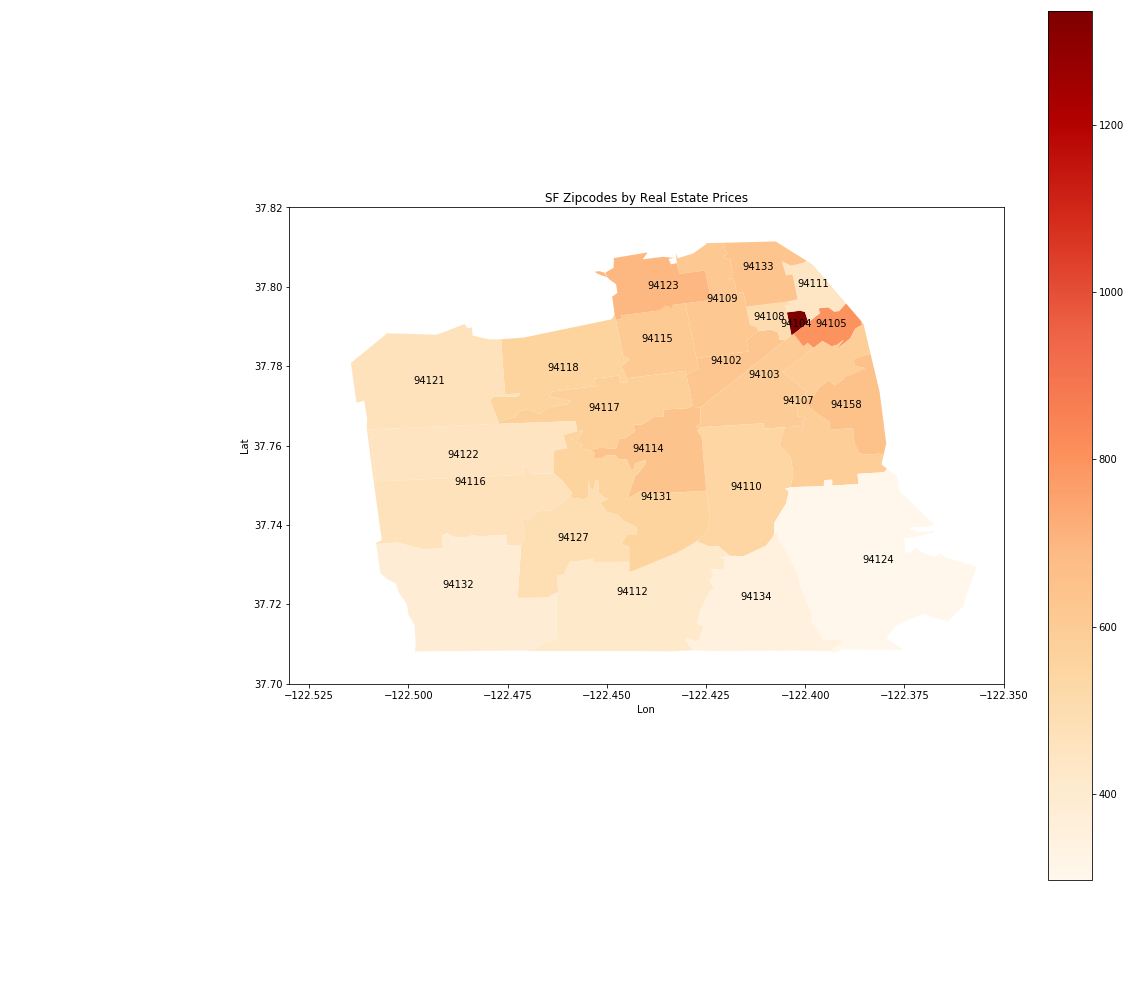

In [16]:
# plot zipcodes with the color indicating the "MedianSoldPricePerSqft_AllHomes"
ax = zips.plot(column = 'MedianSoldPricePerSqft_AllHomes', cmap = 'OrRd', figsize = (16,16), legend = True)
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
ax.set(title = "SF Zipcodes by Real Estate Prices", xlabel = "Lon", ylabel = "Lat")

# add labels
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["RegionName"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row to label zipcodes
zips.apply(add_label, axis = 1)

plt.show()

In the map above, the colors range from light beige (least expensive) to dark red (most expensive). As seen above, there is one zip code (94104) that is much more expensive than the others. I will explore this more below.

In [75]:
# find most expensive zipcodes
zips.sort_values(by = 'MedianSoldPricePerSqft_AllHomes', ascending = False).head()

,RegionName,geometry,MedianSoldPricePerSqft_AllHomes
3,94104,"POLYGON ((-122.404613 37.793565, -122.401315 3...",1336.128581
4,94105,"POLYGON ((-122.403456 37.787776, -122.401939 3...",798.257824
18,94123,"(POLYGON ((-122.450323 37.803584, -122.44829 3...",696.166788
25,94158,"POLYGON ((-122.397866 37.772323, -122.396381 3...",657.211820
11,94114,"POLYGON ((-122.454002 37.758785, -122.451817 3...",650.127729


In [76]:
798/1336

0.5973053892215568

94104 has the most expensive homes, followed by 94105. However, 94105's real estate is much cheaper (the median sold price per square foot for its homes is about 60% of that of 94104). This shows that 94104 is much more expensive than its neighboring zip codes.

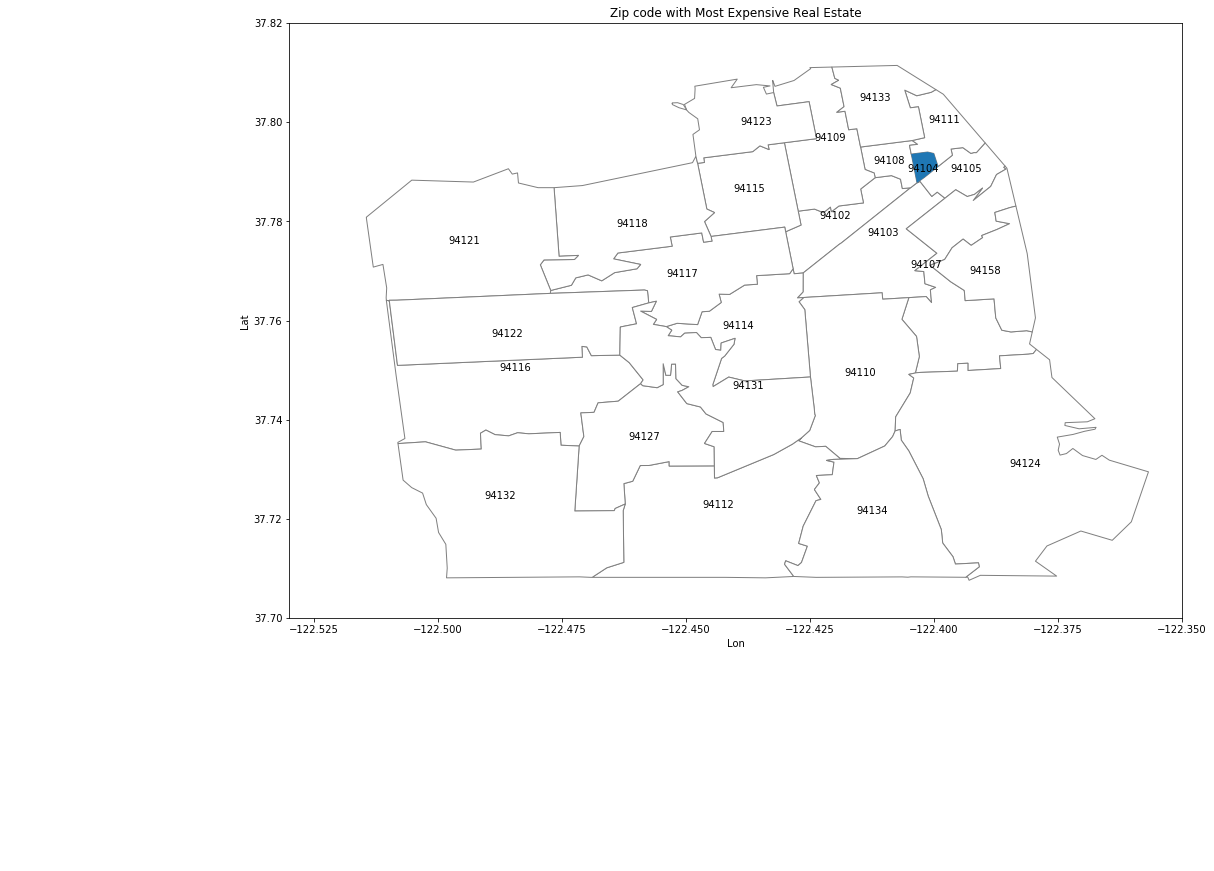

In [18]:
# plot sf zipcodes
ax = zips.plot(color = 'white', edgecolor = 'gray', figsize = (16,16))
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
ax.set(title = "Zip code with Most Expensive Real Estate", xlabel = "Lon", ylabel = "Lat")

# plot most expensive zipcode on map
zips[zips.MedianSoldPricePerSqft_AllHomes == zips.MedianSoldPricePerSqft_AllHomes.max()].plot(ax = ax)

# add labels
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["RegionName"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row to label zipcodes
zips.apply(add_label, axis = 1)

plt.show()

The zip code 94104 has the most expensive real estate in the city. It appears to be the smallest area out of all of the zip codes. It is also part of the Financial District. The Financial District is home to the most corporate headquarters in the city. Because of this, real estate is probably very difficult to come by, and in very high demand because it is so close to many people's workplaces.

In [19]:
# find least expensive zip codes
zips.sort_values(by = 'MedianSoldPricePerSqft_AllHomes', ascending = True).head()

,RegionName,geometry,MedianSoldPricePerSqft_AllHomes
19,94124,"POLYGON ((-122.407752 37.740585, -122.404819 3...",297.008046
24,94134,"POLYGON ((-122.429927 37.711574, -122.427454 3...",347.027455
0,94080,"POLYGON ((-122.469009 37.650404, -122.458997 3...",375.629802
22,94132,"POLYGON ((-122.508087717965 37.735197790538, -...",385.384982
10,94112,"POLYGON ((-122.465994 37.710154, -122.462556 3...",416.744886


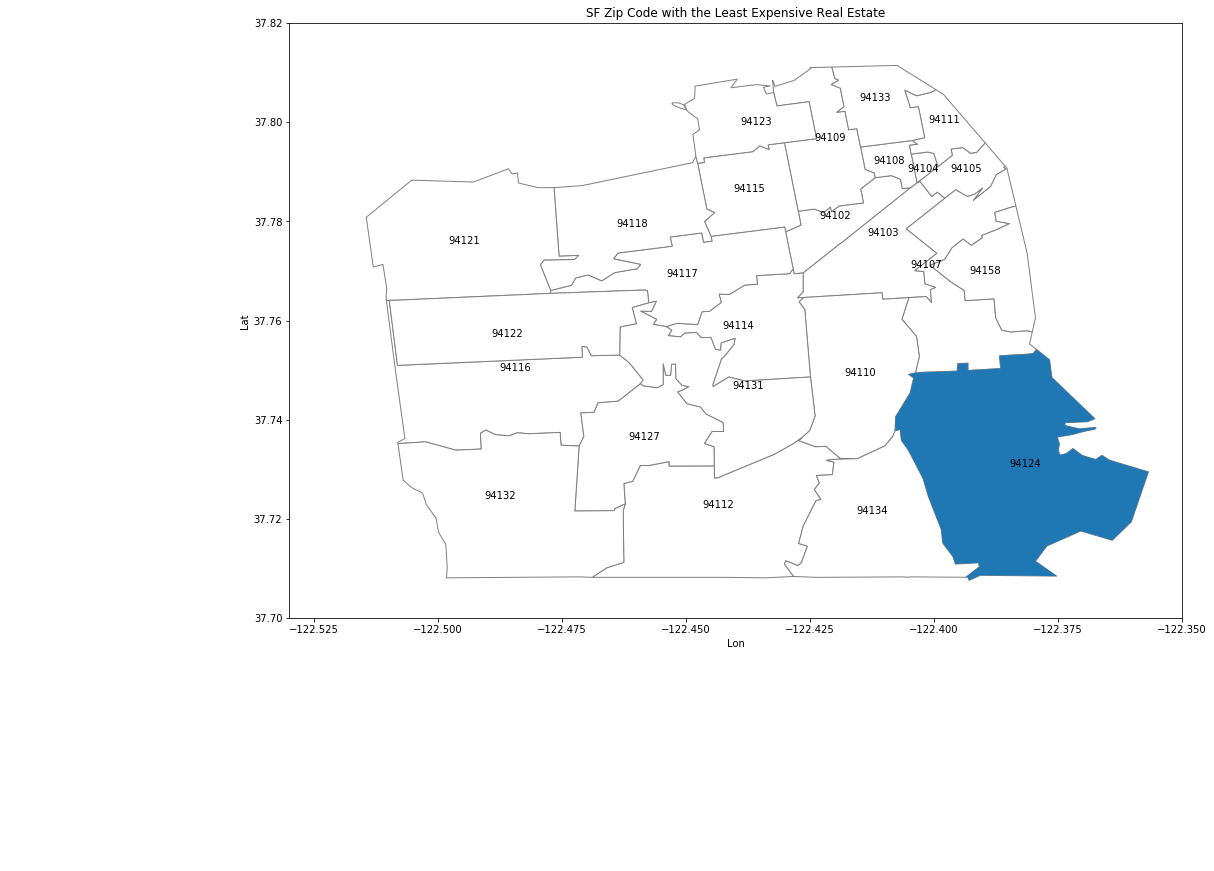

In [20]:
ax = zips.plot(color = 'white', edgecolor = 'gray', figsize = (16,16))
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
ax.set(title = 'SF Zip Code with the Least Expensive Real Estate', xlabel = 'Lon', ylabel = 'Lat')

zips[zips.MedianSoldPricePerSqft_AllHomes == zips.MedianSoldPricePerSqft_AllHomes.min()].plot(ax = ax)

def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["RegionName"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
zips.apply(add_label, axis = 1)

plt.show()

92124 is the zip code with the least expensive real estate in the city. This zipcode corresponds most closely with the Hunters Point neighborhood. This used to have a naval shipyard that was demolished in 2015. They are in the process of redeveloping this. Perhaps that is the reason why the real estate may be more affordable.

__Question 2:__ Which neighborhoods have the most parks?

In [21]:
# sf neighborhoods shapefile
neighborhoods = gpd.read_file("SF Find Neighborhoods/geo_export_1054a485-db4e-4a9c-be4d-016de9205737.shp")
neighborhoods.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [22]:
# read parks table from database
parks = pd.read_sql("""SELECT * FROM parks ORDER BY Lat""", db)
# remove rows with NaN in Latitude column
parks = parks[parks.Lat.isna() == False]
# limit entries to those in San Francisco neighborhoods
parks = parks[parks.Lon < -122]
parks = parks[parks.Lat > 37.65]
# view beginning of parks
parks.head()

,Name,Type,Acreage,ParkID,Lat,Lon
28,KELLOCH VELASCO MINI PARK,Mini Park,1.74,26,37.708543,-122.413149
29,LESSING/SEARS MINI PARK,Mini Park,0.15,14,37.708604,-122.455303
30,ALICE CHALMERS PLAYGROUND,Neighborhood Park or Playground,1.68,25,37.709827,-122.446651
31,LITTLE HOLLYWOOD PARK,Neighborhood Park or Playground,1.31,42,37.709969,-122.398209
32,BROTHERHOOD/CHESTER MINI PARK,Mini Park,0.59,160,37.712382,-122.469903


In [23]:
# make point for each park's latitude/longitude
lnglat = [geom.Point(x) for x in zip(parks.Lon, parks.Lat)]

In [24]:
# make a geopandas dataframe from parks with lnglat as geometry
parks = gpd.GeoDataFrame(parks, geometry = lnglat)
parks.head()

,Name,Type,Acreage,ParkID,Lat,Lon,geometry
28,KELLOCH VELASCO MINI PARK,Mini Park,1.74,26,37.708543,-122.413149,POINT (-122.41314877 37.70854271)
29,LESSING/SEARS MINI PARK,Mini Park,0.15,14,37.708604,-122.455303,POINT (-122.4553029 37.70860406)
30,ALICE CHALMERS PLAYGROUND,Neighborhood Park or Playground,1.68,25,37.709827,-122.446651,POINT (-122.44665065 37.7098271)
31,LITTLE HOLLYWOOD PARK,Neighborhood Park or Playground,1.31,42,37.709969,-122.398209,POINT (-122.39820878 37.70996909)
32,BROTHERHOOD/CHESTER MINI PARK,Mini Park,0.59,160,37.712382,-122.469903,POINT (-122.46990318 37.71238249)


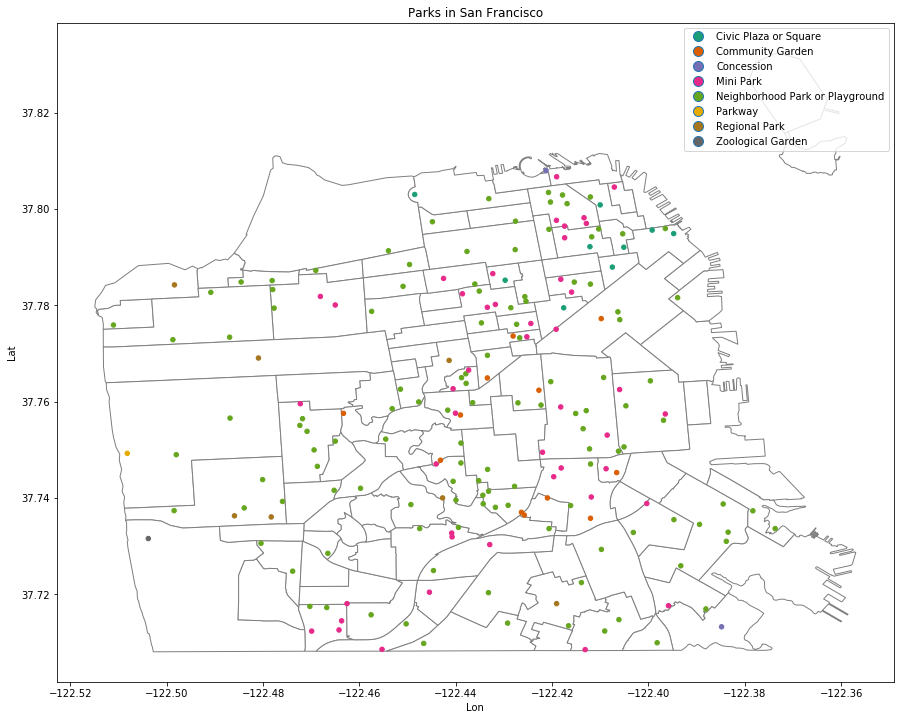

In [25]:
# plot parks with neighborhoods drawn in
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = (15,15))
parks.plot(ax = ax, column = 'Type', cmap = 'Dark2', markersize = 20, legend = True)
ax.set(title = "Parks in San Francisco", xlabel = "Lon", ylabel = "Lat")

plt.show()

The parks seem to be fairly spread out throughout the city, with some more focused at the center. Additionally, as seen visually in the map above and numerically in the result below, "neighborhood park or playground" is the most common type of park in the city. This makes sense because other parks like regional parks usually take up a lot of room and cannot simply fit into any neighborhood, especially where there is already a lot of infrastructure.

In [26]:
# find counts for the types of parks
parks['Type'].value_counts()

Neighborhood Park or Playground    123
Mini Park                           45
Community Garden                    12
Civic Plaza or Square                9
Regional Park                        7
Concession                           2
Parkway                              1
Zoological Garden                    1
Name: Type, dtype: int64

In [27]:
# set crs for latitude/longitude
parks.crs = "+init=epsg:4326"

In [28]:
# join parks with neighborhoods to find which parks fall within which neighborhoods
nparks = gpd.sjoin(parks, neighborhoods, how = "inner", op = "within")

/Users/Mimi/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [29]:
# make sure crs are actually the same
print(parks.crs)
print(neighborhoods.crs)

+init=epsg:4326
{'init': 'epsg:4326'}


In [30]:
# view beginning of geopandas dataframe
nparks.head()

,Name,Type,Acreage,ParkID,Lat,Lon,geometry,index_right,link,name
28,KELLOCH VELASCO MINI PARK,Mini Park,1.74,26,37.708543,-122.413149,POINT (-122.41314877 37.70854271),72,http://en.wikipedia.org/wiki/Visitacion_Valley...,Visitacion Valley
33,VISITACION VALLEY PLAYGROUND,Neighborhood Park or Playground,2.05,27,37.712401,-122.409085,POINT (-122.40908547 37.71240126),72,http://en.wikipedia.org/wiki/Visitacion_Valley...,Visitacion Valley
40,VISITACION VALLEY GREENWAY,Neighborhood Park or Playground,2.13,177,37.714766,-122.406132,POINT (-122.40613194 37.71476638),72,http://en.wikipedia.org/wiki/Visitacion_Valley...,Visitacion Valley
29,LESSING/SEARS MINI PARK,Mini Park,0.15,14,37.708604,-122.455303,POINT (-122.4553029 37.70860406),62,"http://en.wikipedia.org/wiki/Outer_Mission,_Sa...",Outer Mission
37,CAYUGA PLAYGROUND,Neighborhood Park or Playground,2.69,15,37.713888,-122.450297,POINT (-122.45029719 37.71388814),62,"http://en.wikipedia.org/wiki/Outer_Mission,_Sa...",Outer Mission


In [31]:
# count the number of parks in each neighborhood
nparks['name'].value_counts().head(10)

Mission                10
Russian Hill            7
Bernal Heights          6
Golden Gate Heights     6
Potrero Hill            6
Parkside                6
Merced Heights          5
Nob Hill                5
Fairmount               5
Western Addition        5
Name: name, dtype: int64

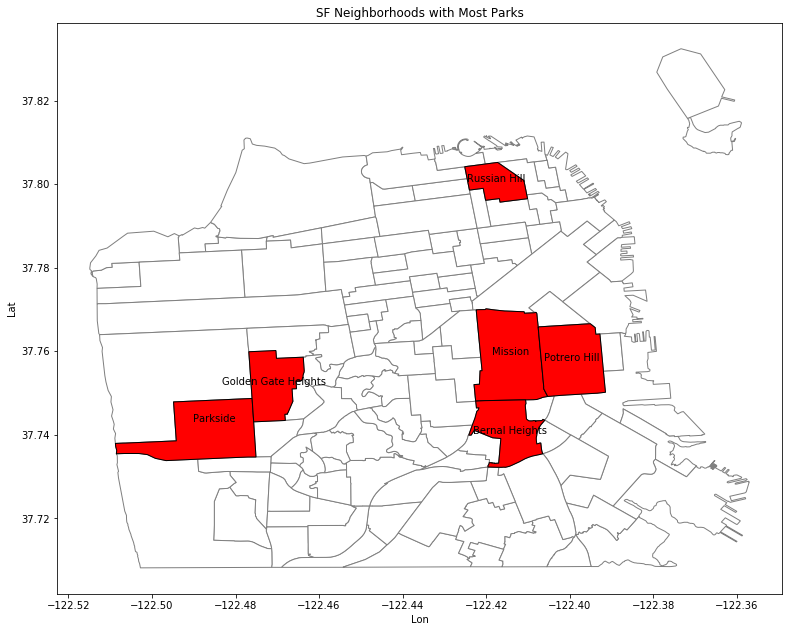

In [32]:
# plot neighborhoods
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = ((13, 13)))

# neighborhoods with most parks
keep = ["Mission", "Russian Hill", "Potrero Hill", "Bernal Heights", "Golden Gate Heights", "Parkside"]

# plot neighborhoods with most parks in red
neighborhoods[neighborhoods.name.isin(keep)].plot(ax = ax, color = "red", edgecolor = "black")
# set title/axis labels
ax.set(title = "SF Neighborhoods with Most Parks", xlabel = "Lon", ylabel = "Lat")

def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
neighborhoods[neighborhoods.name.isin(keep)].apply(add_label, axis = 1)

plt.show()

#neighborhoods[neighborhoods.name == "Mission"].plot(ax = ax, color = "red")
#nparks[nparks.name == "Mission"].plot(ax = ax)

Mission has the most parks out of all of the San Francisco neighborhoods with a total of 10 parks. This is followed by Russian Hill with 7 parks. Potrero Hill, Bernal Heights, Golden Gate Heights, and Parkside all have 6 parks. I thought that the neighborhoods with the most parks might be larger neighborhoods, but as seen above, it is mostly mid-sized neighborhoods. The larger neighborhoods are mostly closer to the beach, which might make them less likely to have parks instead of tourist attractions and buildings.

__Question 3:__ What day of the week did the most larceny/theft occur in 2017? Is there a relationship between larceny/theft location and day of week?

In [78]:
# read crime table from database. Select only larceny/theft rows from 2017
theft = pd.read_sql("""
SELECT * FROM crime WHERE Category = 'LARCENY/THEFT' 
AND Datetime LIKE '2017%' ORDER BY Lat
""", db)
# remove rows with NaN in Latitude column
theft = theft[theft.Lat.isna() == False]
theft.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,170079660,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-01-29 00:30:00,INGLESIDE,NONE,5900 Block of MISSION ST,-122.453461,37.708475
1,176039600,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Friday,2017-01-27 08:00:00,INGLESIDE,NONE,0 Block of ACTON ST,-122.452569,37.708489
2,176045049,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2017-02-01 17:50:00,INGLESIDE,NONE,2600 Block of BAY SHORE BL,-122.405386,37.708647
3,170102205,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Sunday,2017-02-05 09:40:00,INGLESIDE,NONE,ESQUINA DR / GENEVA AV,-122.421617,37.708745
4,170008528,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Tuesday,2017-01-03 19:30:00,INGLESIDE,NONE,1000 Block of HURON AV,-122.453861,37.708760


In [34]:
# make point for each theft's latitude/longitude
lnglat = [geom.Point(x) for x in zip(theft.Lon, theft.Lat)]

In [35]:
theft.shape

(5028, 10)

In [36]:
# make a geopandas dataframe from theft with lnglat as geometry
theft = gpd.GeoDataFrame(theft, geometry = lnglat)
theft.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat,geometry
0,170079660,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-01-29 00:30:00,INGLESIDE,NONE,5900 Block of MISSION ST,-122.453461,37.708475,POINT (-122.45346119547 37.7084753872645)
1,176039600,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Friday,2017-01-27 08:00:00,INGLESIDE,NONE,0 Block of ACTON ST,-122.452569,37.708489,POINT (-122.452569346731 37.70848900258839)
2,176045049,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2017-02-01 17:50:00,INGLESIDE,NONE,2600 Block of BAY SHORE BL,-122.405386,37.708647,POINT (-122.405385735969 37.7086473552327)
3,170102205,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Sunday,2017-02-05 09:40:00,INGLESIDE,NONE,ESQUINA DR / GENEVA AV,-122.421617,37.708745,POINT (-122.421616620564 37.7087447204847)
4,170008528,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Tuesday,2017-01-03 19:30:00,INGLESIDE,NONE,1000 Block of HURON AV,-122.453861,37.708760,POINT (-122.453860524345 37.7087602783686)


In [37]:
# find counts for theft on each day of the week
theft['DayOfWeek'].value_counts()

Saturday     822
Sunday       779
Friday       764
Thursday     726
Wednesday    669
Tuesday      652
Monday       616
Name: DayOfWeek, dtype: int64

In 2017, there was more larceny/theft on the weekends than there was during the week, with Saturday having the highest count. Saturday's count is followed by Sunday's, which is followed by Friday's (all "weekend" days). This might make sense if people tend to steal from shops that are closed on weekends. Additionally, petty theft is probably more common because people have more time on the weekend than during the week (when they would likely be at work).

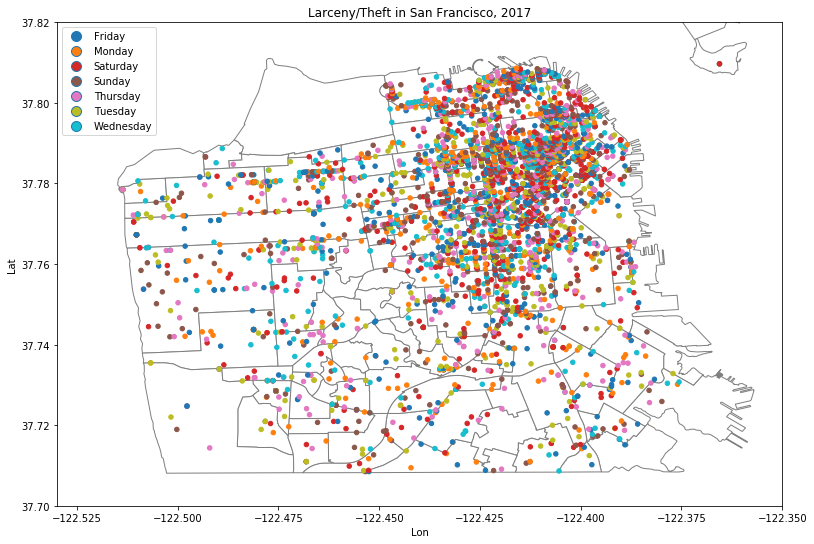

In [38]:
# plot theft with neighborhoods drawn in
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = (13,13))
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
theft.plot(ax = ax, column = 'DayOfWeek',markersize = 20, legend = True)
ax.set(title = "Larceny/Theft in San Francisco, 2017", xlabel = "Lon", ylabel = "Lat")

plt.show()

There seems to be a lot of larceny/theft centered around the northeast side of the city. However, there does not seem to be much of a relationship between day of the week and crime location. If there had been some kind of relationship, the colored points would have shown a pattern, or grouping in certain areas. In this case, however, the colors seem to be very mixed, indicating little to no relationship bewteen the two.

__Question 4:__ Which neighborhoods are the most dangerous if you are worried about being assaulted?

In [79]:
# read crime table from database, seslect only rows for assault in 2017
crime = pd.read_sql("""SELECT * FROM crime WHERE Category = 'ASSAULT' AND Datetime LIKE '2017%' ORDER BY Lat""", db)
# remove rows with NaN in Latitude column
crime = crime[crime.Lat.isna() == False]
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,170102976,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Sunday,2017-02-05 19:00:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROBINSON DR,-122.428717,37.707922
1,170102976,ASSAULT,THREATS AGAINST LIFE,Sunday,2017-02-05 19:00:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROBINSON DR,-122.428717,37.707922
2,170068259,ASSAULT,BATTERY,Wednesday,2017-01-25 08:00:00,TARAVAL,NONE,100 Block of FLOURNOY ST,-122.460832,37.708003
3,170124061,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,2017-02-12 23:30:00,INGLESIDE,NONE,SANTOS ST / GENEVA AV,-122.420084,37.708311
4,170079660,ASSAULT,BATTERY WITH SERIOUS INJURIES,Sunday,2017-01-29 00:30:00,INGLESIDE,NONE,5900 Block of MISSION ST,-122.453461,37.708475


In [40]:
# make point for each crime's latitude/longitude
lnglat = [geom.Point(x) for x in zip(crime.Lon, crime.Lat)]

In [41]:
crime.shape

(1559, 10)

In [42]:
# make a geopandas dataframe from crime with lnglat as geometry
crime = gpd.GeoDataFrame(crime, geometry = lnglat)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat,geometry
0,170102976,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Sunday,2017-02-05 19:00:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROBINSON DR,-122.428717,37.707922,POINT (-122.428716681874 37.7079219034586)
1,170102976,ASSAULT,THREATS AGAINST LIFE,Sunday,2017-02-05 19:00:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROBINSON DR,-122.428717,37.707922,POINT (-122.428716681874 37.7079219034586)
2,170068259,ASSAULT,BATTERY,Wednesday,2017-01-25 08:00:00,TARAVAL,NONE,100 Block of FLOURNOY ST,-122.460832,37.708003,POINT (-122.460831639621 37.7080034569459)
3,170124061,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,2017-02-12 23:30:00,INGLESIDE,NONE,SANTOS ST / GENEVA AV,-122.420084,37.708311,POINT (-122.420084075242 37.7083109744591)
4,170079660,ASSAULT,BATTERY WITH SERIOUS INJURIES,Sunday,2017-01-29 00:30:00,INGLESIDE,NONE,5900 Block of MISSION ST,-122.453461,37.708475,POINT (-122.45346119547 37.7084753872645)


In [43]:
# find counts for assaults on each day of the week
crime['DayOfWeek'].value_counts()

Sunday       267
Saturday     238
Tuesday      231
Friday       223
Wednesday    210
Monday       202
Thursday     188
Name: DayOfWeek, dtype: int64

Similar to theft, assaults seem to be more common on the weekends. This makes sense because people are more likely to be "out and about" on the weekends instead of being at home or at work. This increase in outdoor activity raises the chances of conflict and gives opportunity to criminals to find victims.

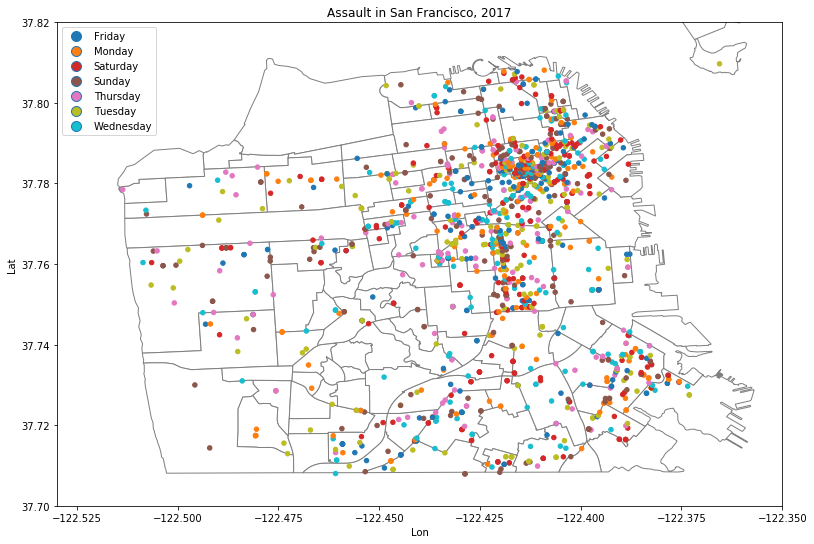

In [44]:
# plot crimes with neighborhoods drawn in
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = (13,13))
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
crime.plot(ax = ax, column = 'DayOfWeek',markersize = 20, legend = True)
ax.set(title = "Assault in San Francisco, 2017", xlabel = "Lon", ylabel = "Lat")

plt.show()

Assault shows a similar pattern to larceny/theft, though slightly more sparse. It is still focused in the central to Northeast part of the city. This seems to be a popular area.

In [45]:
# set crs for latitude/longitude
crime.crs = "+init=epsg:4326"

In [46]:
# join crime with neighborhoods to find which crimes fall within which neighborhoods
ncrimes = gpd.sjoin(crime, neighborhoods, how = "inner", op = "within")

/Users/Mimi/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [47]:
# make sure crs are actually the same
print(crime.crs)
print(neighborhoods.crs)

+init=epsg:4326
{'init': 'epsg:4326'}


In [48]:
# view beginning of geopandas dataframe
ncrimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat,geometry,index_right,link,name
4,170079660,ASSAULT,BATTERY WITH SERIOUS INJURIES,Sunday,2017-01-29 00:30:00,INGLESIDE,NONE,5900 Block of MISSION ST,-122.453461,37.708475,POINT (-122.45346119547 37.7084753872645),69,"http://en.wikipedia.org/wiki/Crocker-Amazon,_S...",Crocker Amazon
5,170107976,ASSAULT,INFLICT INJURY ON COHABITEE,Tuesday,2017-02-07 14:30:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROEMER WY,-122.446572,37.709030,POINT (-122.446571654745 37.7090296042376),69,"http://en.wikipedia.org/wiki/Crocker-Amazon,_S...",Crocker Amazon
6,170107976,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Tuesday,2017-02-07 14:30:00,INGLESIDE,"ARREST, BOOKED",0 Block of ROEMER WY,-122.446572,37.709030,POINT (-122.446571654745 37.7090296042376),69,"http://en.wikipedia.org/wiki/Crocker-Amazon,_S...",Crocker Amazon
8,170097189,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Friday,2017-02-03 18:37:00,INGLESIDE,"ARREST, BOOKED",0 Block of CASSANDRA CT,-122.448709,37.709391,POINT (-122.448709310437 37.7093911042026),69,"http://en.wikipedia.org/wiki/Crocker-Amazon,_S...",Crocker Amazon
42,170118036,ASSAULT,MAYHEM WITH A DEADLY WEAPON,Friday,2017-02-10 23:00:00,INGLESIDE,NONE,5500 Block of MISSION ST,-122.444631,37.712642,POINT (-122.444631449197 37.712642025771),69,"http://en.wikipedia.org/wiki/Crocker-Amazon,_S...",Crocker Amazon


In [49]:
# count the number of crimes in each neighborhood (most to least)
ncrimes['name'].value_counts(ascending = False).head()

South of Market            181
Mission                    179
Tenderloin                 152
Bayview                     78
Downtown / Union Square     43
Name: name, dtype: int64

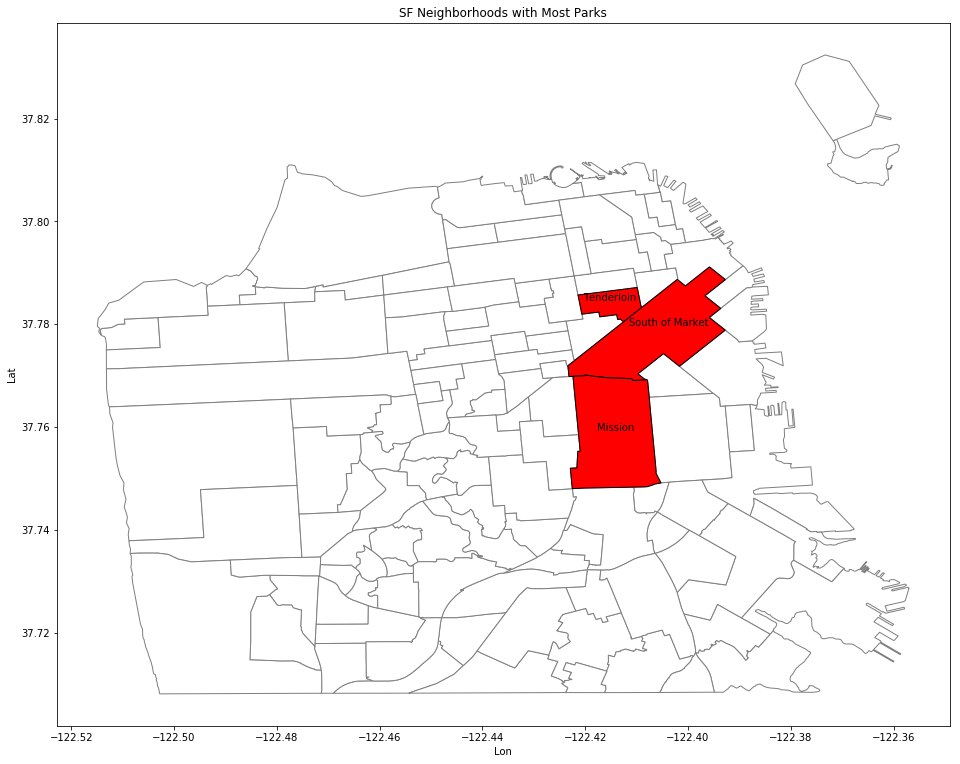

In [50]:
# plot neighborhoods
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = ((16, 16)))

# neighborhoods with most parks
keep = ["South of Market", "Mission", "Tenderloin"]

# plot neighborhoods with most parks in red
neighborhoods[neighborhoods.name.isin(keep)].plot(ax = ax, color = "red", edgecolor = "black")
# set title/axis labels
ax.set(title = "SF Neighborhoods with Most Parks", xlabel = "Lon", ylabel = "Lat")

def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
neighborhoods[neighborhoods.name.isin(keep)].apply(add_label, axis = 1)

plt.show()

South of Market, Mission, and Tenderloin are the three neighborhoods with the most assaults. This is consistent with the cluster of points shown in the map above. Additionally, Tenderloin has a much smaller area than either of the other two neighborhoods, and it still rivals them in the number of assaults. Therefore, I would argue that it is in fact more dangerous from a crime density perspective.

In [51]:
# count the number of crimes in each neighborhood (least to most)
ncrimes['name'].value_counts(ascending = True).head(20)

Balboa Terrace                  1
Aquatic Park / Ft. Mason        1
Mt. Davidson Manor              1
Sutro Heights                   1
Cole Valley                     1
Presidio Heights                1
Clarendon Heights               1
Sunnyside                       1
Yerba Buena Island              1
Midtown Terrace                 1
Apparel City                    1
St. Francis Wood                1
Westwood Park                   2
Laurel Heights / Jordan Park    2
Central Waterfront              2
Corona Heights                  2
Golden Gate Heights             2
Produce Market                  2
Eureka Valley                   2
Candlestick Point SRA           2
Name: name, dtype: int64

There are many neighborhoods that have only one account of assault in 2017. Therefore, I conclude that we would need to look at data further back in time to find which neighborhoods truly have the least assaults.

__Question 5:__ What times are best for getting food at a mobile food vendor? And which locations?

In [52]:
# read in mobile_food_locations grouped by StartHour, then by EndHour
foodtime = pd.read_sql("""
SELECT StartHour, EndHour FROM mobile_food_schedule 
GROUP BY StartHour, EndHour
""", db)

In [53]:
# number of locations that open at each time (most to least)
foodtime.StartHour.value_counts(ascending = False)

6     13
8     12
10    12
11    12
9     10
0      8
7      8
17     5
12     4
16     4
13     3
14     3
15     3
18     3
22     2
20     2
21     2
5      2
19     1
4      1
23     1
Name: StartHour, dtype: int64

In [54]:
# proportion of food trucks that open at or before 11am
(13+12+12+12+10+8+8+2+1)/foodtime.StartHour.value_counts().sum()

0.70270270270270274

In [55]:
# find the number of locations that close at each time (most to least)
foodtime.EndHour.value_counts(ascending = False)

20    11
22    10
18    10
16     9
15     8
14     7
12     6
21     6
17     6
19     5
23     4
13     3
10     3
9      3
8      3
3      3
1      3
11     2
7      2
5      2
2      2
0      2
6      1
Name: EndHour, dtype: int64

In [56]:
# proportion of food trucks that close at or after 2pm
(11+10+10+9+8+6+6+5+5+4+3)/foodtime.EndHour.value_counts().sum()

0.69369369369369371

There are many mobile food locations that open at 6am, and many that close at 8pm, so even though you might not get the exact vendor you want, you will very likely find something open between those times. However, if you want more options, the majority (70%) of mobile food vendors open by 11am and the majority (69%) of mobile food vendors close at or after 2pm. Thus, if you wish to have the most choices of mobile food vendors, you should go for lunch between 11am and 2pm.

In [57]:
# choose the mobile_food_locations table
food = pd.read_sql("""
SELECT * FROM mobile_food_locations
""", db)
food.head()

,locationid,LocationDescription,Address,Latitude,Longitude
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532
1,437211,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630),555 MISSOURI ST,37.759304,-122.395902
2,765880,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299),2222 17TH ST,37.765216,-122.406007
3,765690,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...,2323 CESAR CHAVEZ ST,37.748801,-122.400552
4,751253,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,37.767852,-122.416105


In [58]:
# make point for each food truck's latitude/longitude
lnglat = [geom.Point(x) for x in zip(food.Longitude, food.Latitude)]

In [59]:
# make a geopandas dataframe from food with lnglat as geometry
food = gpd.GeoDataFrame(food, geometry = lnglat)
food.head()

,locationid,LocationDescription,Address,Latitude,Longitude,geometry
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
1,437211,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630),555 MISSOURI ST,37.759304,-122.395902,POINT (-122.395902231236 37.7593037663834)
2,765880,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299),2222 17TH ST,37.765216,-122.406007,POINT (-122.406006972029 37.7652159489938)
3,765690,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...,2323 CESAR CHAVEZ ST,37.748801,-122.400552,POINT (-122.400552458785 37.7488013777145)
4,751253,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,37.767852,-122.416105,POINT (-122.416104892532 37.7678524427181)


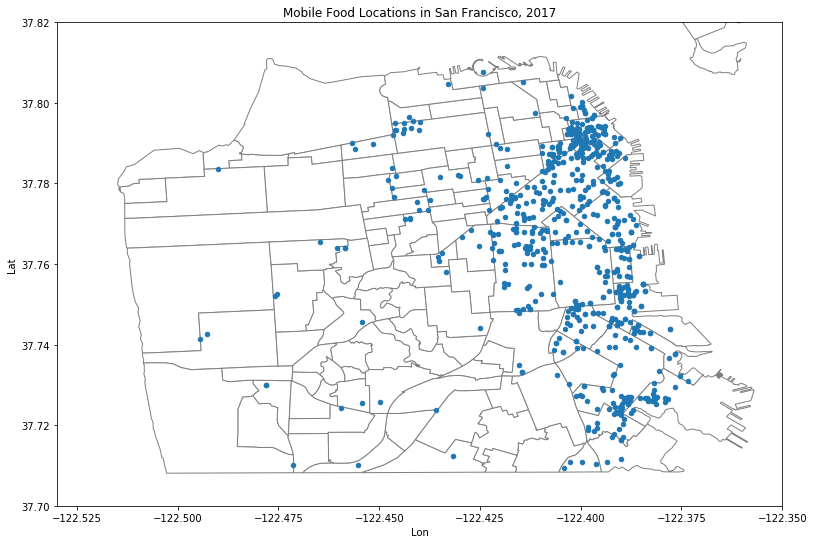

In [60]:
# plot food locations with neighborhoods drawn in
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = (13,13))
ax.set_ylim([37.70, 37.82])
ax.set_xlim([-122.53, -122.35])
food.plot(ax = ax, markersize = 20)
ax.set(title = "Mobile Food Locations in San Francisco, 2017", xlabel = "Lon", ylabel = "Lat")

plt.show()

This plot shows that the food trucks are mostly on the East and Northeast side of the city. Further investigation below will show the number of food trucks by neighborhood.

In [61]:
# set crs for latitude/longitude
food.crs = "+init=epsg:4326"

In [62]:
# join food with neighborhoods to find which locations fall within which neighborhoods
nfood = gpd.sjoin(food, neighborhoods, how = "inner", op = "within")

/Users/Mimi/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [63]:
# make sure crs are actually the same
print(food.crs)
print(neighborhoods.crs)

+init=epsg:4326
{'init': 'epsg:4326'}


In [64]:
# view beginning of geopandas dataframe
nfood.head()

,locationid,LocationDescription,Address,Latitude,Longitude,geometry,index_right,link,name
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388),30,http://www.sfgate.com/neighborhoods/sf/soma/,South of Market
5,761933,05TH ST: BLUXOME ST to TOWNSEND ST (650 - 699),670 05TH ST,37.775589,-122.397977,POINT (-122.39797690638 37.7755890799594),30,http://www.sfgate.com/neighborhoods/sf/soma/,South of Market
10,509478,RUSS ST: HOWARD ST to FOLSOM ST (100 - 199),150 RUSS ST,37.778076,-122.407711,POINT (-122.407711134267 37.7780755347517),30,http://www.sfgate.com/neighborhoods/sf/soma/,South of Market
14,509492,FOLSOM ST: RAUSCH ST to RODGERS ST (1148 - 1175),1150 FOLSOM ST,37.775950,-122.409294,POINT (-122.409294222069 37.775950411261),30,http://www.sfgate.com/neighborhoods/sf/soma/,South of Market
18,765723,05TH ST: WELSH ST to BRANNAN ST (530 - 599),530 05TH ST,37.776876,-122.400260,POINT (-122.400259575202 37.7768763887765),30,http://www.sfgate.com/neighborhoods/sf/soma/,South of Market


In [70]:
# count the number of food locations in each neighborhood (most to least)
nfood['name'].value_counts(ascending = False).head(10)

Financial District         97
South of Market            96
Mission                    57
Central Waterfront         57
Bayview                    41
Mission Bay                36
Potrero Hill               30
Downtown / Union Square    28
Produce Market             26
Hunters Point              20
Name: name, dtype: int64

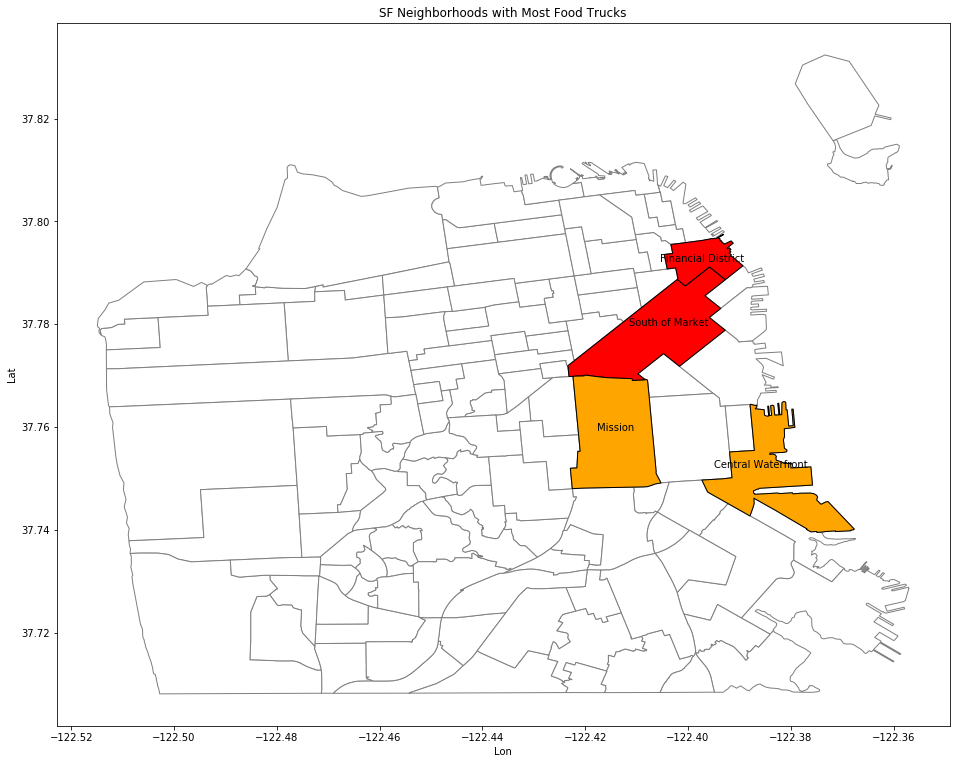

In [71]:
# plot neighborhoods
ax = neighborhoods.plot(color = "white", edgecolor = "gray", figsize = ((16, 16)))

# neighborhoods with most food locations
many = ["Financial District", "South of Market"]

# neighborhoods with moderate number of food locations
moderate = ["Mission", "Central Waterfront"]

# plot neighborhoods with most food locations in red
neighborhoods[neighborhoods.name.isin(many)].plot(ax = ax, color = "red", edgecolor = "black")

neighborhoods[neighborhoods.name.isin(moderate)].plot(ax = ax, color = "orange", edgecolor = "black")

# set title/axis labels
ax.set(title = "SF Neighborhoods with Most Food Trucks", xlabel = "Lon", ylabel = "Lat")

def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["name"], xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
neighborhoods[neighborhoods.name.isin(many)].apply(add_label, axis = 1)
neighborhoods[neighborhoods.name.isin(moderate)].apply(add_label, axis = 1)

plt.show()

The above map shows the 2 neighborhoods with the most food trucks (Financial District and South of Market) in red, and 2 neighborhoods with a moderate number of food trucks (Mission and Central Waterfront) in orange. It is not entirely surprising that the Financial District has the most food trucks despite being such a small neighborhood; it is home to many corporate offices. Mobile food vendors would likely make a lot of business in an area where employees go to eat during the day. This also fits with the earlier observation that most food trucks are open within lunch hours (11am-2pm) as they would like to capitalize on employees wanting lunch during that time.